# Bike Sharing Assignment
#### by Anurag Bombarde

## Problem Statement

BoomBikes have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands



# Reading and Understanding the data and EDA

In [756]:
#import numppy and pandas and Statsmodel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [757]:
#read the dataset
boombikes_df = pd.read_csv("/Users/anurag/Desktop/day.csv")
boombikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [758]:
boombikes_df.shape

(730, 16)

In [759]:
boombikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [760]:
boombikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [761]:
# visualising
# sns.pairplot(boombikes_df)
# plt.show()

In [762]:
#visualising categorical variable
# plt.figure(figsize=(10,8))
# sns.boxplot(x='dteday',y='cnt',data=boombikes_df)

Above categorical visualization doesnt give any sort of insight , lets convert seasons values into categorical variables ##

In [763]:
# season : season (1:spring, 2:summer, 3:fall, 4:winter)
boombikes_df['season'] = boombikes_df['season'].map({1: 'spring',2 : 'summer',3 : 'fall',4 : 'winter'})


In [764]:
boombikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


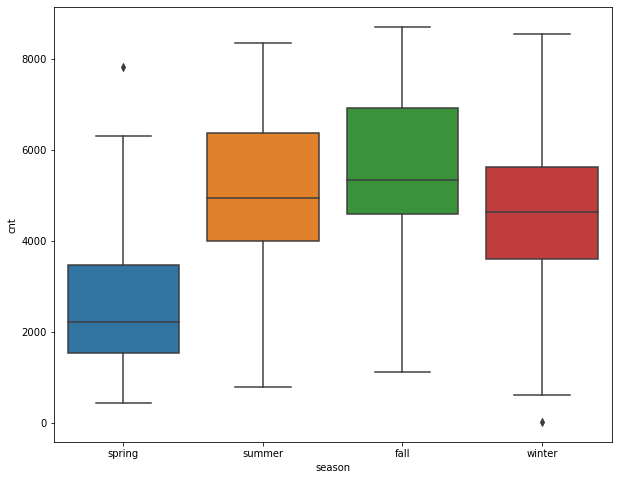

In [765]:
plt.figure(figsize=(10,8))
sns.boxplot(x='season',y='cnt',data=boombikes_df)

In [766]:
boombikes_df['weathersit'] = boombikes_df['weathersit'].map({1: 'Clear',2 : 'Cloudy',3 : 'Light Snow or Rain',4 : 'Heavy Rain'})


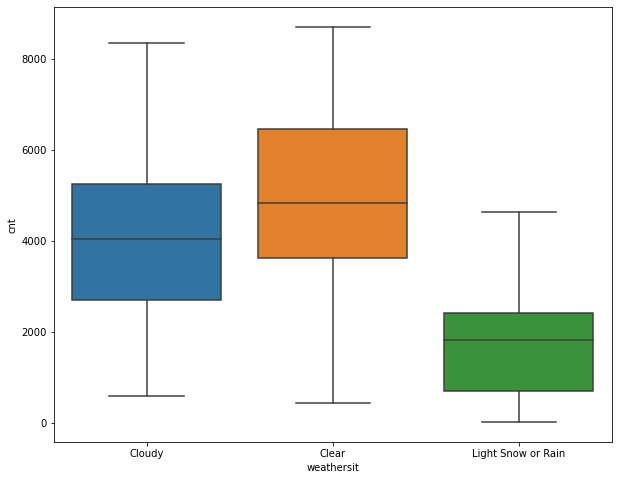

In [767]:
plt.figure(figsize=(10,8))
sns.boxplot(x='weathersit',y='cnt',data=boombikes_df)

## Data Preperation for Modelling

In [768]:
#lets drop columns instant ,dteday - date also casual and registered as they are summing to count and its seems to be of not having great significance 
boombikes_df = boombikes_df.drop(['instant','dteday','casual','registered'],axis=1)
boombikes_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,4,1,Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,12,0,5,1,Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,12,0,6,0,Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,12,0,0,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [769]:
boombikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 68.6+ KB


In [770]:
boombikes_df['yr'] = boombikes_df['yr'].map({0: '2018',1 : '2019'})


In [771]:
boombikes_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,0,4,1,Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,12,0,5,1,Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,12,0,6,0,Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,12,0,0,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


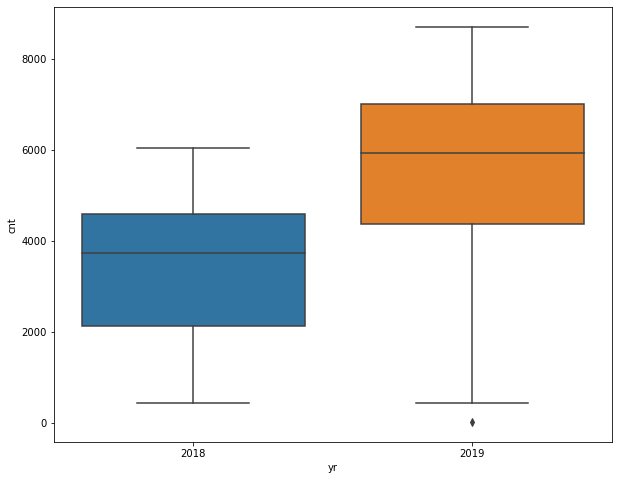

In [772]:
plt.figure(figsize=(10,8))
sns.boxplot(x='yr',y='cnt',data=boombikes_df)

In [773]:
#create dummy variables for year column
boombikes_df = pd.get_dummies(boombikes_df , columns = ['season','yr','weathersit'],drop_first=True)

# dummy_boombikes_data = pd.get_dummies(boombikes_df['season','yr','weathersit'])

boombikes_df

,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,weathersit_Cloudy,weathersit_Light Snow or Rain
0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0
1,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0
2,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0
3,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0
4,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,12,0,4,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,1,1,0
726,12,0,5,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,1,1,0
727,12,0,6,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,1,1,0
728,12,0,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,1,0,0


In [774]:
boombikes_df.columns

Index(['mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'weathersit_Cloudy', 'weathersit_Light Snow or Rain'],
      dtype='object')

In [775]:
# plt.figure(figsize=(10,8))
# sns.boxplot(x='yr_2018',y='cnt',data=boombikes_df)

## Train-Test Split

### We need to now creare Train and test data frame with 70:30 ratio

In [776]:
boombikes_df_train , boombikes_df_test = train_test_split(boombikes_df,train_size=0.7,random_state=100)
print(boombikes_df_train.shape)
print(boombikes_df_test.shape)

(510, 15)
(220, 15)


## Rescaling the Features 

#### We have rescale numerical variables to have them on same scale for this we will use MinMax scaler

In [777]:
#instantiate an object
scaler = MinMaxScaler()
#create a lost of numeric cariables
# mnth	holiday	weekday	workingday	
# temp	atemp	hum	windspeed	casual	registered
num_vars = ['temp','atemp','hum','windspeed','cnt']
boombikes_df_train[num_vars] = scaler.fit_transform(boombikes_df_train[num_vars])
boombikes_df_train.head()
#Fit on data


,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,weathersit_Cloudy,weathersit_Light Snow or Rain
576,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,0
426,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,1,0
728,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,0
482,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,1,0
111,4,0,5,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1,0


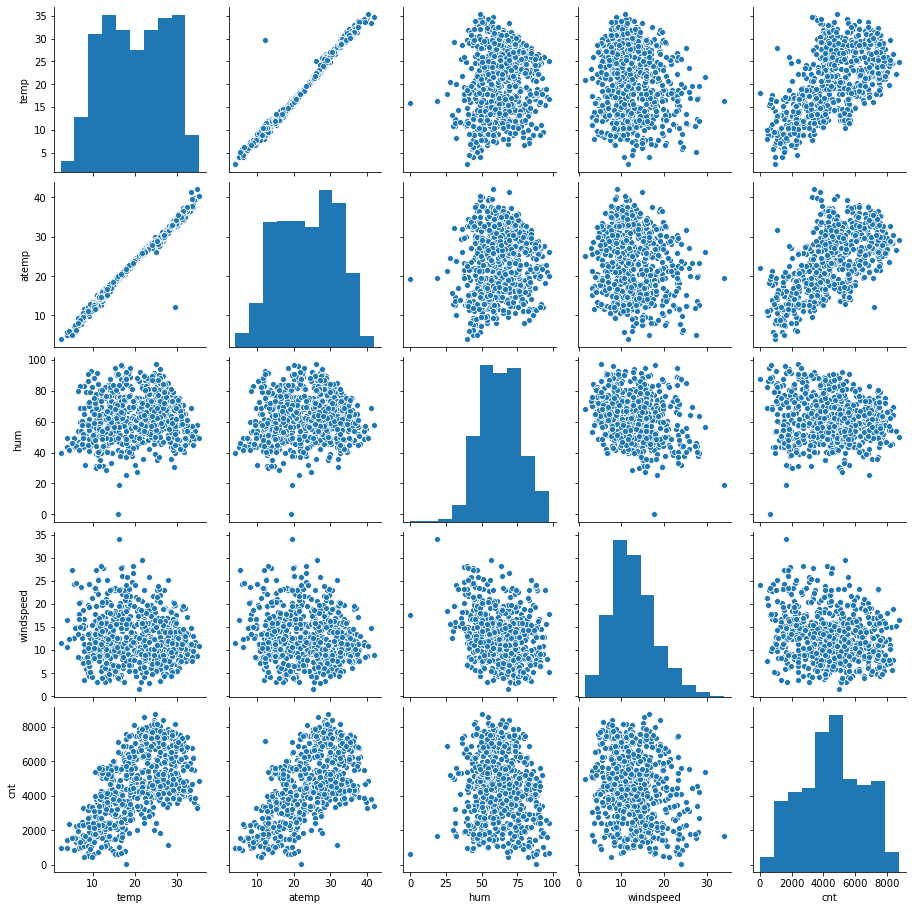

In [778]:
#Pairplot
sns.pairplot(boombikes_df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

In [779]:
boombikes_df_train.describe()

,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,weathersit_Cloudy,weathersit_Light Snow or Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,6.541176,0.025490,2.990196,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,0.345098,0.029412
std,3.465416,0.157763,2.017093,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,0.475867,0.169124
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,3.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,10.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training the Model 

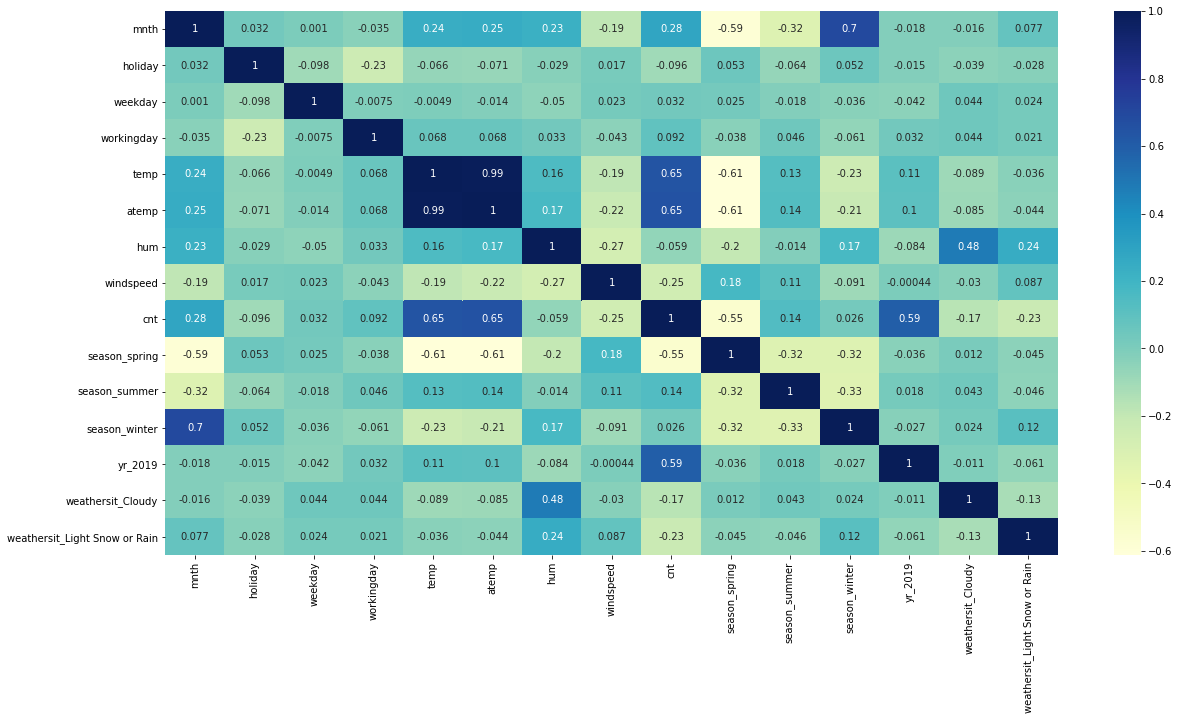

In [780]:
#heatmap
plt.figure(figsize=(20,10))
sns.heatmap(boombikes_df_train.corr(),annot=True,cmap = "YlGnBu")
plt.show()

In [781]:
boombikes_df.head()

,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,weathersit_Cloudy,weathersit_Light Snow or Rain
0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0
1,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0
2,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0
3,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0
4,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0


In [782]:
#X_train , y_train
y_train = boombikes_df_train.pop('cnt')
X_train = boombikes_df_train

In [783]:
X_train.head()

,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,weathersit_Cloudy,weathersit_Light Snow or Rain
576,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,0
426,3,0,6,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,1,0
728,12,0,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,0
482,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0,1,0,1,1,0
111,4,0,5,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,1,0


In [784]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

### Add a constant 
#### Add All variables to the model and remove one at a time

In [785]:
boombikes_df.columns


Index(['mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'weathersit_Cloudy', 'weathersit_Light Snow or Rain'],
      dtype='object')

In [786]:
#build the model with All vqariables
#Add constant
X_train_sm = sm.add_constant(X_train)

#create the model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     176.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.01e-182
Time:                        01:02:18   Log-Likelihood:                 495.79
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     495   BIC:                            -898.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2386      0.039      6.047      0.000       0.161       0.316
mnth                              0.0014      0.002      0.578      0.563      -0.003       0.006
holiday                          -0.0638      0.027     -2.351      0.019      -0.117      -0.010
weekday                           0.0081      0.002      3.878      0.000       0.004       0.012
workingday                        0.0187      0.009      2.059      0.040       0.001       0.037
temp                              0.4329      0.139      3.118      0.002       0.160       0.706
atemp                             0.0628      0.142      0.443      0.658      -0.216       0.342
hum                              -0.1281      0.039     -3.288      0.001      -0.205      -0.052
windspeed                        -0.1783      0.027     -6.597      0.000      -0.231      -0.125
season_spring                    -0.0695      0.023     -3.013      0.003      -0.115      -0.024
season_summer                     0.0473      0.016      3.027      0.003       0.017       0.078
season_winter                     0.0835      0.019      4.472      0.000       0.047       0.120
yr_2019                           0.2322      0.008     27.702      0.000       0.216       0.249
weathersit_Cloudy                -0.0566      0.011     -5.203      0.000      -0.078      -0.035
weathersit_Light Snow or Rain    -0.2463      0.027     -9.024      0.000      -0.300      -0.193
==============================================================================
Omnibus:                       73.421   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.997
Skew:                          -0.731   Prob(JB):                     4.08e-41
Kurtosis:                       5.572   Cond. No.                         387.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF

In [787]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,temp,379.68
5,atemp,366.74
6,hum,30.76
0,mnth,15.37
7,windspeed,5.05
10,season_winter,4.72
8,season_spring,4.36
3,workingday,3.20
2,weekday,3.18
9,season_summer,2.66


### We will remove variable as below combination 
- High P , High VIF
- High P , Low VIF
- Low P , High VIF

#### So here atemp has high p value and high VIF

In [788]:
X = X_train.drop('atemp',axis=1)


In [789]:
X_train_sm = sm.add_constant(X)

#create the model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.35e-183
Time:                        01:02:21   Log-Likelihood:                 495.69
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2384      0.039      6.048      0.000       0.161       0.316
mnth                              0.0014      0.002      0.581      0.561      -0.003       0.006
holiday                          -0.0643      0.027     -2.375      0.018      -0.118      -0.011
weekday                           0.0080      0.002      3.864      0.000       0.004       0.012
workingday                        0.0187      0.009      2.058      0.040       0.001       0.037
temp                              0.4925      0.034     14.427      0.000       0.425       0.560
hum                              -0.1273      0.039     -3.274      0.001      -0.204      -0.051
windspeed                        -0.1807      0.027     -6.817      0.000      -0.233      -0.129
season_spring                    -0.0684      0.023     -2.985      0.003      -0.113      -0.023
season_summer                     0.0485      0.015      3.152      0.002       0.018       0.079
season_winter                     0.0848      0.018      4.614      0.000       0.049       0.121
yr_2019                           0.2321      0.008     27.721      0.000       0.216       0.249
weathersit_Cloudy                -0.0567      0.011     -5.218      0.000      -0.078      -0.035
weathersit_Light Snow or Rain    -0.2470      0.027     -9.079      0.000      -0.300      -0.194
==============================================================================
Omnibus:                       72.086   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.883
Skew:                          -0.718   Prob(JB):                     1.94e-40
Kurtosis:                       5.558   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [790]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,hum,30.71
4,temp,17.18
0,mnth,15.37
6,windspeed,4.83
9,season_winter,4.58
7,season_spring,4.28
3,workingday,3.20
2,weekday,3.17
8,season_summer,2.56
11,weathersit_Cloudy,2.33


So now its evident that month has p value = 0.561 and VIG as 15.37 , lets remove it

In [791]:
X = X.drop('hum',axis=1)


In [792]:
X_train_sm = sm.add_constant(X)

#create the model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     201.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.18e-182
Time:                        01:02:24   Log-Likelihood:                 490.24
No. Observations:                 510   AIC:                            -954.5
Df Residuals:                     497   BIC:                            -899.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.1768      0.035      5.054      0.000       0.108       0.245
mnth                              0.0006      0.002      0.273      0.785      -0.004       0.005
holiday                          -0.0640      0.027     -2.341      0.020      -0.118      -0.010
weekday                           0.0087      0.002      4.176      0.000       0.005       0.013
workingday                        0.0191      0.009      2.077      0.038       0.001       0.037
temp                              0.4663      0.034     13.916      0.000       0.400       0.532
windspeed                        -0.1551      0.026     -6.065      0.000      -0.205      -0.105
season_spring                    -0.0785      0.023     -3.426      0.001      -0.124      -0.033
season_summer                     0.0420      0.015      2.729      0.007       0.012       0.072
season_winter                     0.0761      0.018      4.142      0.000       0.040       0.112
yr_2019                           0.2352      0.008     27.986      0.000       0.219       0.252
weathersit_Cloudy                -0.0775      0.009     -8.705      0.000      -0.095      -0.060
weathersit_Light Snow or Rain    -0.2827      0.025    -11.225      0.000      -0.332      -0.233
==============================================================================
Omnibus:                       70.663   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.708
Skew:                          -0.711   Prob(JB):                     7.01e-39
Kurtosis:                       5.499   Cond. No.                         99.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [793]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,mnth,13.69
4,temp,10.16
5,windspeed,4.71
8,season_winter,4.09
3,workingday,3.18
2,weekday,3.17
6,season_spring,2.31
9,yr_2019,2.07
7,season_summer,1.95
10,weathersit_Cloudy,1.56


In [794]:
X = X.drop('mnth',axis=1)


In [795]:
X_train_sm = sm.add_constant(X)

#create the model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.17e-183
Time:                        01:02:26   Log-Likelihood:                 490.20
No. Observations:                 510   AIC:                            -956.4
Df Residuals:                     498   BIC:                            -905.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.1813      0.031      5.887      0.000       0.121       0.242
holiday                          -0.0638      0.027     -2.335      0.020      -0.117      -0.010
weekday                           0.0087      0.002      4.197      0.000       0.005       0.013
workingday                        0.0190      0.009      2.073      0.039       0.001       0.037
temp                              0.4669      0.033     13.978      0.000       0.401       0.532
windspeed                        -0.1552      0.026     -6.073      0.000      -0.205      -0.105
season_spring                    -0.0813      0.020     -3.968      0.000      -0.122      -0.041
season_summer                     0.0402      0.014      2.919      0.004       0.013       0.067
season_winter                     0.0782      0.017      4.718      0.000       0.046       0.111
yr_2019                           0.2351      0.008     28.032      0.000       0.219       0.252
weathersit_Cloudy                -0.0775      0.009     -8.714      0.000      -0.095      -0.060
weathersit_Light Snow or Rain    -0.2828      0.025    -11.244      0.000      -0.332      -0.233
==============================================================================
Omnibus:                       70.807   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.444
Skew:                          -0.712   Prob(JB):                     4.85e-39
Kurtosis:                       5.506   Cond. No.                         46.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [796]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,temp,5.26
4,windspeed,4.63
2,workingday,3.16
1,weekday,3.10
5,season_spring,2.28
8,yr_2019,2.07
6,season_summer,1.86
7,season_winter,1.75
9,weathersit_Cloudy,1.55
0,holiday,1.10


### RSqaured value is more or less same even afer dropping mnth so this seems to be the correct model . Lets proceed for residual Analysis

## This seems to be the best model considering VIF and P Values.

## Residual Analysis

In [797]:
y_train_pred = lr_model.predict(X_train_sm)


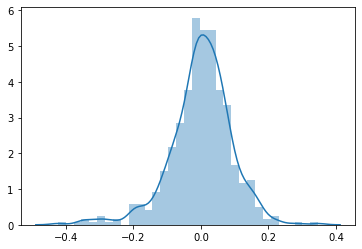

In [798]:
res = y_train - y_train_pred
sns.distplot(res)

### This is looking at centered at zero and normally distributed

## Predictions and Evaluation on the test Set

### Whatever preprocessing we have done on training set we have to do it on test set. On Train set we have done scalaer transoformation hence on test set as well we have to do the same thing

In [799]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
boombikes_df_test[num_vars] = scaler.transform(boombikes_df_test[num_vars])
boombikes_df_test.head()

,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,weathersit_Cloudy,weathersit_Light Snow or Rain
184,7,1,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0
535,6,0,3,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,0
299,10,0,4,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1,0
221,8,0,3,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,0
152,6,0,4,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0


In [800]:
boombikes_df_test.describe()

,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,weathersit_Cloudy,weathersit_Light Snow or Rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,6.490909,0.036364,3.013636,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.481818,0.318182,0.027273
std,3.422316,0.187620,1.985057,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.500809,0.466833,0.163248
min,1.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,1.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,3.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,0.000000,5.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,12.000000,1.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [801]:
y_test = boombikes_df_test.pop('cnt')
X_test = boombikes_df_test

In [802]:
#Add constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,weathersit_Cloudy,weathersit_Light Snow or Rain
184,1.0,7,1,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,1,0
535,1.0,6,0,3,1,0.901354,0.842587,0.610133,0.153728,0,1,0,1,0,0
299,1.0,10,0,4,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,1,0
221,1.0,8,0,3,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0,0
152,1.0,6,0,4,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0


In [803]:
X_test_sm = X_test_sm.drop(['mnth','atemp','hum'],axis=1)

In [804]:
#predict 
y_test_pred = lr_model.predict(X_test_sm)

In [805]:
#evaluate the model
r2_score(y_true=y_test , y_pred=y_test_pred)

0.8054089914540106

#### This is very near to the rsquare we got from OLS Regression results

Text(0, 0.5, 'y_test_pred')

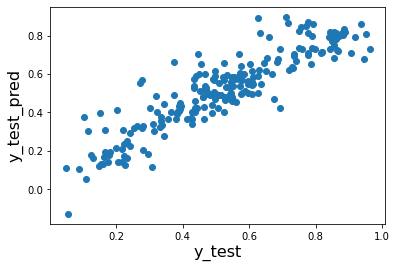

In [806]:
fig=plt.figure()
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test',fontsize=16)
plt.ylabel('y_test_pred',fontsize=16)

### The equation of best  fitted line is 

#### cnt = 0.4669 x tmp + 0.0087 x weekday + 0.0190 x workingday - 0.0638 x holiday - 0.1552 x windspeed - 0.0813 x season_spring + 0.0402 x season_summer + 0.0782 x season_winter + 0.2351 x yr_2019 - 0.0775 x weathersit_Cloudy - 0.2828 x weathersit_Light Snow or Rain + 0.1813

## RFE - rescursive feature elimination 
#### lets find out using sklearn

In [808]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [809]:
linearRegress = LinearRegression()
linearRegress.fit(X_train,y_train)

rfe = RFE(linearRegress , 11)
rfe = rfe.fit(X_train,y_train)

In [810]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('mnth', False, 4),
 ('holiday', True, 1),
 ('weekday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light Snow or Rain', True, 1)]

In [811]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'weathersit_Cloudy',
       'weathersit_Light Snow or Rain'],
      dtype='object')

In [812]:
X_train.columns[~rfe.support_]

Index(['mnth', 'weekday', 'workingday'], dtype='object')

In [813]:
X_train_rfe = X_train[col]

In [814]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [815]:
linearMod = sm.OLS(y_train,X_train_rfe).fit()

In [816]:
print(linearMod.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.1
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.27e-181
Time:                        01:03:05   Log-Likelihood:                 486.01
No. Observations:                 510   AIC:                            -948.0
Df Residuals:                     498   BIC:                            -897.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [817]:
# we need to drop atemp looking at its pvalue , this approach is hybrid approacjh
X_train_new = X_train_rfe.drop(['atemp'],axis=1)

In [818]:
X_train_lm = sm.add_constant(X_train_new)

In [819]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [820]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          8.27e-183
Time:                        01:03:07   Log-Likelihood:                 485.99
No. Observations:                 510   AIC:                            -950.0
Df Residuals:                     499   BIC:                            -903.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [821]:
X_train_new.columns

Index(['const', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'weathersit_Cloudy',
       'weathersit_Light Snow or Rain'],
      dtype='object')

In [822]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,72.53
5,season_spring,4.55
2,temp,3.50
7,season_winter,3.10
6,season_summer,2.07
3,hum,1.87
9,weathersit_Cloudy,1.56
10,weathersit_Light Snow or Rain,1.24
4,windspeed,1.19
8,yr_2019,1.03


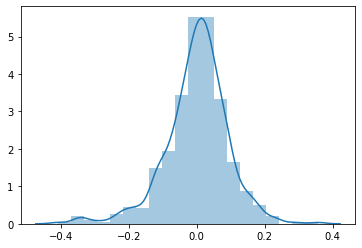

In [823]:
y_train_cnt = lm.predict(X_train_lm)
sns.distplot((y_train - y_train_cnt),bins=20)

#### Failry centred and normally distributed

In [824]:

X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [825]:
y_pred_rfe = lm.predict(X_test_new)

In [826]:
r2_score(y_true=y_test , y_pred=y_pred_rfe)

0.8068409066288984

##### Very very close to statsmodel technique

Text(0, 0.5, 'y_pred_rfe')

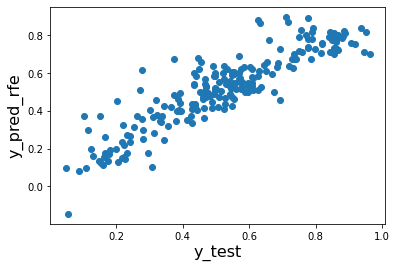

In [827]:
fig=plt.figure()
plt.scatter(y_test,y_pred_rfe)
plt.xlabel('y_test',fontsize=16)
plt.ylabel('y_pred_rfe',fontsize=16)